## Group 2A11
- 

## Group Contributions Statement

## Data Import and Cleaning

In [8]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split

#getting the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)


#splitting the data set
X=penguins[["Flipper Length (mm)", "Culmen Length (mm)", "Island"]].dropna()
y=penguins["Species"].dropna()


X_train,X_test=train_test_split(X,test_size=.2)
y_train,y_test=train_test_split(y,test_size=.2)

X_train

,Flipper Length (mm),Culmen Length (mm),Island
131,197.0,43.1,Torgersen
335,230.0,55.1,Biscoe
117,199.0,37.3,Torgersen
61,195.0,41.3,Biscoe
157,198.0,45.2,Dream
...,...,...,...
252,207.0,45.1,Biscoe
322,215.0,47.2,Biscoe
334,217.0,46.2,Biscoe
161,198.0,51.3,Dream


In [9]:
#changing species names to numbers
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)   #do we need to shorten names and change numbers?

penguins
#X_train[X_train["Culmen Depth (mm)"]==np.nan] #no nan values in X_train or X_test

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


## Exploratory Analysis

### Figure 1. Scatterplot

Next we will use a scatterplot to visualize the relationship between Culmen Length and Flipper Length for penguins of different species.

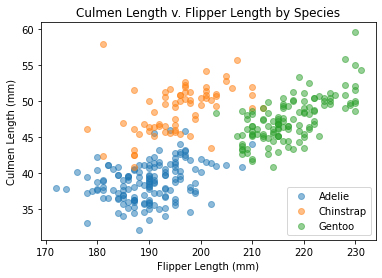

In [7]:
fig,ax = plt.subplots(1)
ax.set(xlabel="Flipper Length (mm)",
       ylabel="Culmen Length (mm)",
       title="Culmen Length v. Flipper Length by Species")

penguins["Species"]=penguins["Species"].str.split().str.get(0)
uniqueSpecies=set(penguins["Species"])
for x in uniqueSpecies: 
    test = penguins[penguins["Species"]==x]
    ax.scatter(test["Flipper Length (mm)"],
               test["Culmen Length (mm)"], alpha = 0.5, label = x)
ax.legend()

#### Discussion of figure 2:

From our scatterplot, we can see distinct clusters of Gentoo, Chinstrap, Adelie penguins when grouped by culmen length and flipper length. Gentoo penguins tend to have longer flippers and mid-sized culmens, Adelie penguins seem to have the shortest flippers and culmens while Chinstraps have shorter flippers but similar culmen lengths to Gentoo penguins. These distinctions suggest we may want to use these the culmen length and flipper length features as predictor variables for our models. 

Now that we have identified some distinctions when grouped by species, let's explore further differences when the species are grouped by island. 

### Figure 2. Faceted Histogram

Let’s make another figure to visualize the Culmen Lengths of different species where we split up the plots by species AND island. 

Text(0.5, 1.0, 'Culmen Lengths by Island and Species')

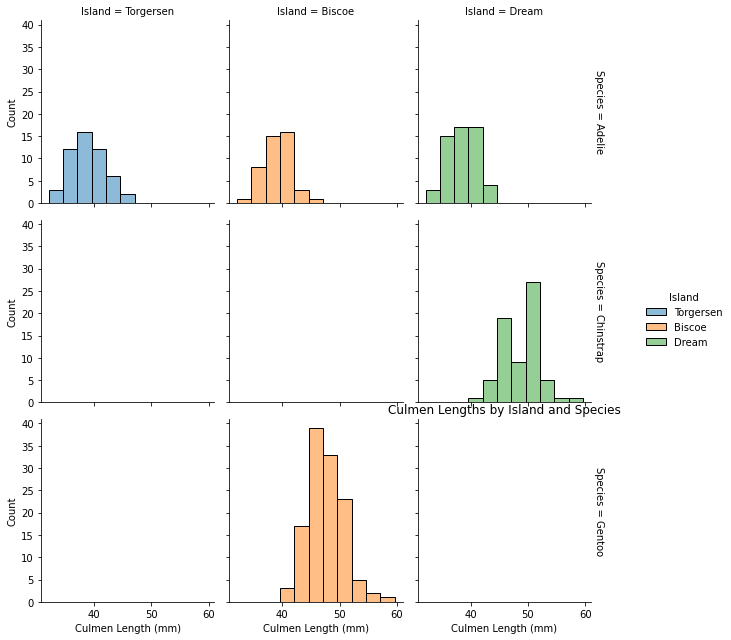

In [19]:
#histogram, body mass of each penguin grouped by island and species
penguins["Species"] = penguins["Species"].str.split().str.get(0)
plot=sns.displot(penguins, 
                 x="Culmen Length (mm)", 
                 col="Island", 
                 row="Species", 
                 hue = "Island", 
                 facet_kws=dict(margin_titles=True),
                 height = 3)
plt.title("Culmen Lengths by Island and Species")
#plot.fig.suptitle("Culmen Lengths by Island and Species")

#### Discusion of figure 2:

From these plots, it seems like Adelie penguins have the shortest culmen's regardless of which Island they are on. The Gentoo penguins on Biscoe island have longer culmen lengths than the Adelie on Biscoe and similarly, Chinstraps on Dream Island have longer culmens than the Adelie on Dream Island. 

This faceted histogram help us visualize the differences between species on separate islands more clearly. In particular, if we had grouped by only islands, it would have been more difficult to discern that it is the Adelie specifically whom have short culmens. We can also note that Gentoo penguins only exist on Biscoe Island and Chinstraps only exist on Dream.

### Table

Here we have a summary of the information we have on the culmen lengths of each species when grouped by island. 

In [14]:
penguins[["Culmen Length (mm)", "Island", "Species"]].groupby(["Island", "Species"]).describe()

Culmen Length (mm)                                     \
                                 count       mean       std   min     25%   
Island    Species                                                           
Biscoe    Adelie                  44.0  38.975000  2.480916  34.5  37.675   
          Gentoo                 123.0  47.504878  3.081857  40.9  45.300   
Dream     Adelie                  56.0  38.501786  2.465359  32.1  36.750   
          Chinstrap               68.0  48.833824  3.339256  40.9  46.350   
Torgersen Adelie                  51.0  38.950980  3.025318  33.5  36.650   

                                          
                       50%     75%   max  
Island    Species                         
Biscoe    Adelie     38.70  40.700  45.6  
          Gentoo     47.30  49.550  59.6  
Dream     Adelie     38.55  40.375  44.1  
          Chinstrap  49.55  51.075  58.0  
Torgersen Adelie     38.90  41.100  46.0

#### Discussion of Table:

This table matches our histogram from above and shows us that Adelie penguins live on all three Islands while Gentoo penguins only live on Biscoe Island and Chinstraps only live on Dream Island.

These statistic summaries also show us that Adelie penguins have average culmen lengths of around 38-39 (mm) and Gentoo and Chinstraps have average culmen lengths of 47-49 (mm). This gives us a quantitative value we can use to distinguish Adelie penguins. Although Gentoo and Chinstraps have similar culmen lengths, since we know that they exist on separate islands, we can use that information to distinguish between them.

## Feature Selection

## Modeling

## Discussion